<a href="https://colab.research.google.com/github/maximilianoesquivel/data_challenge_2022/blob/main/DataChallenge2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

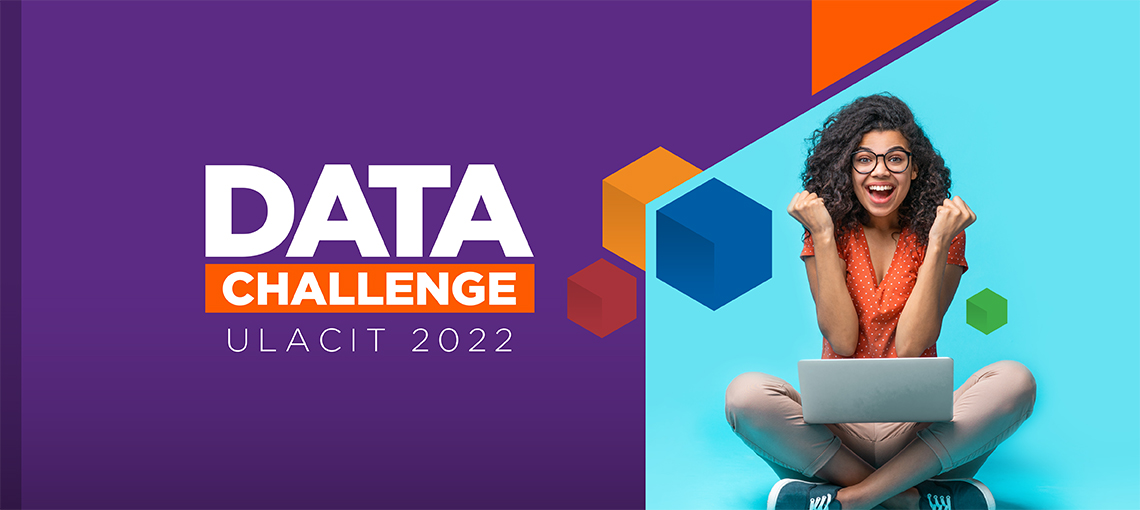

**Data Challenge 2022**


*Análisis de Datos sobre el Cambio Climático*


Grupo: AFK Scientists

*   Maximiliano Esquivel Cerdas
*   Alexander Valverde Guillén
*   Alejandro Abrego Blanco



**ULACIT**

# Introducción

El cambio climático se refiere a los cambios a largo plazo de las temperaturas y los patrones climáticos. Estos cambios pueden ser naturales, por ejemplo, a través de las variaciones del ciclo solar. Pero desde el siglo XIX, las actividades humanas han sido el principal motor del cambio climático, debido principalmente a la quema de combustibles fósiles como el carbón, el petróleo y el gas. United Nations. (2020) 

La quema de combustibles fósiles genera emisiones de gases de efecto invernadero que actúan como una manta que envuelve a la Tierra, atrapando el calor del sol y elevando las temperaturas. United Nations. (2020)

Algunos ejemplos de emisiones de gases de efecto invernadero que provocan el cambio climático son el dióxido de carbono y el metano. Estos proceden del uso de la gasolina para conducir un coche o del carbón para calentar un edificio, por ejemplo. El desmonte de tierras y bosques también puede liberar dióxido de carbono. Los vertederos de basura son una fuente importante de emisiones de metano. La energía, la industria, el transporte, los edificios, la agricultura y el uso del suelo se encuentran entre los principales emisores. United Nations. (2020)

Y es este último precisamente, el sector de energía, el que se va a analizar en este documento. Esto con el objetivo de ver si existe una relación entre la cantidad de energía consumida y/o producida con la generación de gases de efecto invernadero. Esto es posible gracias a los datos suministrados por parte del SINAMECC. 

El Sistema Nacional de Métrica de Cambio Climático de Costa Rica (SINAMECC) es la plataforma oficial de Costa Rica para coordinar la información climática en el país. El sistema sirve para rastrear el progreso de la política nacional de cambio climático, permitir la toma de decisiones basada en datos y facilitar la presentación de informes bajo compromisos nacionales e internacionales.

El SINAMECC surge a partir de la necesidad de contar con información que mida el avance en el cumplimiento de las metas climáticas de Costa Rica, las cuales se reflejan en la Estrategia Nacional de Cambio Climático y sus políticas.

# Desarrollo


Para el correcto análisis de los datos suministrados, primero se va a realizar el análisis exploratorio y la limpieza de los datos, esto con el objetivo de poder visualizar mejor con qué datos se están tratando. Estos pasos serán los que se van a realizar a continuación para cada archivo.

In [1]:
## Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from numpy import mean, ptp, var, std


#### Consumo Final por Sector

##### Análisis Exploratorio de los Datos

In [8]:
## Asignación de los datos a un dataframe:

Con_Final_Sector = pd.read_csv('Consumo final por sector1.csv')
Con_Final_Sector.head(10)

,Ano,RESIDENCIAL,SERVICIOS,COMERCIAL,PUBLICO,TRANSPORTE,INDUSTRIA,AGROPECUARIO
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0


In [9]:
## Echar un vistazo las columnas:

Con_Final_Sector.columns

Index(['Ano', 'RESIDENCIAL', 'SERVICIOS', 'COMERCIAL', 'PUBLICO', 'TRANSPORTE',
       'INDUSTRIA', 'AGROPECUARIO'],
      dtype='object')

##### Limpieza de Datos

In [10]:
## Revisar Datos Faltantes:

total = Con_Final_Sector.isnull().sum().sort_values(ascending = False)
percent = (Con_Final_Sector.isnull().sum() / Con_Final_Sector.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Ano,0,0.0
RESIDENCIAL,0,0.0
SERVICIOS,0,0.0
COMERCIAL,0,0.0
PUBLICO,0,0.0
TRANSPORTE,0,0.0
INDUSTRIA,0,0.0
AGROPECUARIO,0,0.0


##### Gráficos

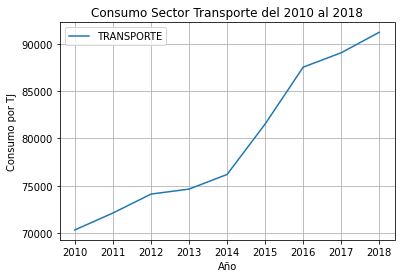

In [46]:
## Creación Gráfico Transporte
Con_Final_Sector.plot.line(x='Ano',y="TRANSPORTE",grid=True, 
                      title="Consumo Sector Transporte del 2010 al 2018", xlabel="Año", 
                      ylabel="Consumo por TJ")
plt.savefig('Con_Final_Sector2IMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera;

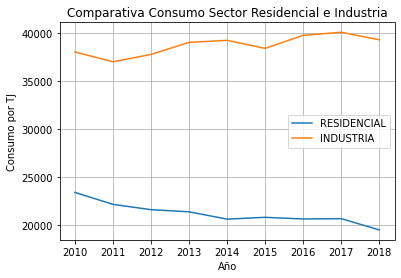

In [12]:
## Creación Gráfico Comparativa Consumo Sector Residencial e Industria
Con_Final_Sector.plot.line(x='Ano',y=["RESIDENCIAL","INDUSTRIA"],grid=True, 
                      title="Comparativa Consumo Sector Residencial e Industria", xlabel="Año", 
                      ylabel="Consumo por TJ");

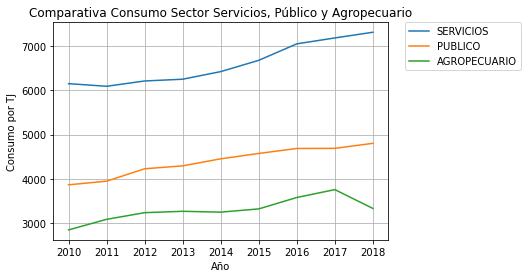

In [23]:
## Creación Gráfico Comparativa Consumo Sector Servicios, Público y Agropecuario
Con_Final_Sector.plot.line(x='Ano',y=["SERVICIOS","PUBLICO","AGROPECUARIO"],grid=True, 
                      title="Comparativa Consumo Sector Servicios, Público y Agropecuario", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) ## Poner leyenda afuera del grafico
plt.savefig('Con_Final_SectorIMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera

##### Estadisticas Descriptivas

In [24]:
## Descripción Estadística de los Datos Numéricos
Con_Final_Sector.describe()

,Ano,RESIDENCIAL,SERVICIOS,COMERCIAL,PUBLICO,TRANSPORTE,INDUSTRIA,AGROPECUARIO
count,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000
mean,2014.000000,21180.000000,6588.111111,3964.888889,4395.00000,79635.333333,38701.444444,3302.666667
std,2.738613,1114.178621,475.301600,366.217642,332.69205,7907.027681,1002.551010,260.672208
min,2010.000000,19481.000000,6087.000000,3479.000000,3869.00000,70319.000000,36973.000000,2854.000000
25%,2012.000000,20620.000000,6206.000000,3636.000000,4230.00000,74111.000000,37995.000000,3242.000000
50%,2014.000000,20791.000000,6417.000000,3980.000000,4454.00000,76186.000000,38994.000000,3273.000000
75%,2016.000000,21586.000000,7042.000000,4306.000000,4687.00000,87538.000000,39262.000000,3337.000000
max,2018.000000,23382.000000,7303.000000,4464.000000,4803.00000,91231.000000,40047.000000,3761.000000


#### Consumo Final

##### Análisis Exploratorio de los Datos

In [25]:
## Asignación de los datos a un dataframe:

Con_Final = pd.read_csv('/content/Consumo final.csv')
Con_Final.head(10)

,Descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energetico),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
5,1.a Coccion,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
6,1.b Enfriamiento,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
7,1.c Iluminacion,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
8,1.d Produccion de calor,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
9,1.e Generacion de fuerza,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"


In [26]:
## Echar un vistazo las columnas:

Con_Final.columns

Index(['Descripcion', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [27]:
## Crear otro data set
DBCF = Con_Final

##### Limpieza de Datos

In [28]:
DBCF

,Descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energetico),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
...,...,...,...,...,...,...,...,...,...,...
78,6.d Enfriamiento,-,-,-,-,0,0,0,0,0
79,6.e Generacion de fuerza,-,-,-,-,0,0,0,0,0
80,6.f Otros,-,-,-,-,0,0,0,0,0
81,Agropecuario,"2,854.00","3,092.00","3,242.00","3,273.00","3,254.00","3,327.00","3,584.00","3,761.00","3,337.00"


In [29]:
## Revisar Datos Faltantes:

total = Con_Final.isnull().sum().sort_values(ascending = False)
percent = (Con_Final.isnull().sum() / Con_Final.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Descripcion,0,0.0
2010,0,0.0
2011,0,0.0
2012,0,0.0
2013,0,0.0
2014,0,0.0
2015,0,0.0
2016,0,0.0
2017,0,0.0
2018,0,0.0


In [30]:
## Eliminar valores nulos o iguales a 0 
DBCF1 = DBCF.drop(DBCF[DBCF['2018']=="0"].index)

In [31]:
## Quitar las , de los numeros
DBCF1['2010']=DBCF1['2010'].str.replace(',','')
DBCF1['2011']=DBCF1['2011'].str.replace(',','')
DBCF1['2012']=DBCF1['2012'].str.replace(',','')
DBCF1['2013']=DBCF1['2013'].str.replace(',','')
DBCF1['2014']=DBCF1['2014'].str.replace(',','')
DBCF1['2015']=DBCF1['2015'].str.replace(',','')
DBCF1['2016']=DBCF1['2016'].str.replace(',','')
DBCF1['2017']=DBCF1['2017'].str.replace(',','')
DBCF1['2018']=DBCF1['2018'].str.replace(',','')

In [32]:
## Pasar de str a int
DBCF1['2010'] = pd.to_numeric(DBCF1['2010'])
DBCF1['2011'] = pd.to_numeric(DBCF1['2011'])
DBCF1['2012'] = pd.to_numeric(DBCF1['2012'])
DBCF1['2013'] = pd.to_numeric(DBCF1['2013'])
DBCF1['2014'] = pd.to_numeric(DBCF1['2014'])
DBCF1['2015'] = pd.to_numeric(DBCF1['2015'])
DBCF1['2016'] = pd.to_numeric(DBCF1['2016'])
DBCF1['2017'] = pd.to_numeric(DBCF1['2017'])
DBCF1['2018'] = pd.to_numeric(DBCF1['2018'])


In [33]:
DBCF1

,Descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,152180.0,150782.0,154301.0,156069.0,157966.0,164134.0,173415.0,176835.0,176935.0
1,Consumo final (no energ.),3065.0,1802.0,2480.0,2427.0,2607.0,3337.0,4440.0,5541.0,5592.0
2,Consumo final (energetico),149115.0,148979.0,151821.0,153642.0,155359.0,160797.0,168975.0,171294.0,171342.0
3,Residencial,23382.0,22139.0,21586.0,21366.0,20603.0,20791.0,20620.0,20652.0,19481.0
4,1. Urbano,10514.0,11513.0,11950.0,12090.0,12606.0,13197.0,13459.0,13687.0,13521.0
5,1.a Coccion,2076.0,2078.0,2154.0,2264.0,2463.0,2588.0,2916.0,2943.0,3138.0
6,1.b Enfriamiento,2076.0,2078.0,2154.0,2264.0,2463.0,2588.0,2916.0,2943.0,3138.0
7,1.c Iluminacion,2076.0,2078.0,2154.0,2264.0,2463.0,2588.0,2916.0,2943.0,3138.0
8,1.d Produccion de calor,2076.0,2078.0,2154.0,2264.0,2463.0,2588.0,2916.0,2943.0,3138.0
9,1.e Generacion de fuerza,2076.0,2078.0,2154.0,2264.0,2463.0,2588.0,2916.0,2943.0,3138.0


In [34]:
## Tomar los valores por analizar

Sectores = DBCF1.iloc[[3,11,12,33,40]]
TiposTransporte = DBCF1.iloc[[15,31,32]]
MediosTransporte = DBCF1.iloc[[16,21,25,28,29,30]]



In [35]:
## Sectores
Sectores

,Descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Residencial,23382.0,22139.0,21586.0,21366.0,20603.0,20791.0,20620.0,20652.0,19481.0
16,Servicios,6146.0,6087.0,6206.0,6246.0,6417.0,6671.0,7042.0,7175.0,7303.0
17,Comercial,3513.0,3479.0,3636.0,3870.0,3980.0,4114.0,4306.0,4322.0,4464.0
38,Industria,37995.0,36973.0,37740.0,38994.0,39206.0,38368.0,39728.0,40047.0,39262.0
81,Agropecuario,2854.0,3092.0,3242.0,3273.0,3254.0,3327.0,3584.0,3761.0,3337.0


In [36]:
Sectoresdf=Sectores.set_index('Descripcion')

In [37]:
Sectoresdf

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Descripcion,,,,,,,,,
Residencial,23382.0,22139.0,21586.0,21366.0,20603.0,20791.0,20620.0,20652.0,19481.0
Servicios,6146.0,6087.0,6206.0,6246.0,6417.0,6671.0,7042.0,7175.0,7303.0
Comercial,3513.0,3479.0,3636.0,3870.0,3980.0,4114.0,4306.0,4322.0,4464.0
Industria,37995.0,36973.0,37740.0,38994.0,39206.0,38368.0,39728.0,40047.0,39262.0
Agropecuario,2854.0,3092.0,3242.0,3273.0,3254.0,3327.0,3584.0,3761.0,3337.0


In [38]:
Sectoresdf.columns = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [39]:
Sectores2 = Sectoresdf.transpose()

In [41]:
Sectores2 = Sectores2.assign(Anno = ['2010', '2011', '2012', '2013','2014','2015','2016',
                                     '2017','2018'])

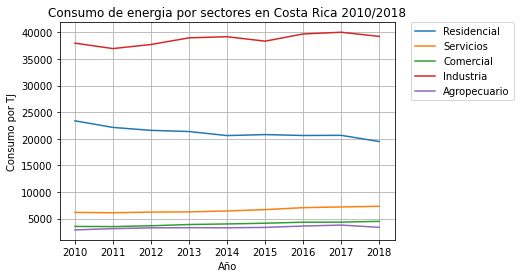

In [42]:
## Creación Gráfico Comparativa "Consumo de energia por sectores en Costa Rica"
Sectores2.plot.line(x='Anno',y=["Residencial","Servicios","Comercial","Industria","Agropecuario"],grid=True, 
                      title="Consumo de energia por sectores en Costa Rica 2010/2018", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [43]:
## Tipos de transporte
TiposTransporte=TiposTransporte.set_index('Descripcion')

In [44]:
TiposTransporte = TiposTransporte.transpose()

In [45]:
TiposTransporte

Descripcion,Terrestre,Maritimo,Aereo
2010,63360.0,85.0,6874.0
2011,64876.0,84.0,7149.0
2012,66765.0,56.0,7290.0
2013,67772.0,90.0,6775.0
2014,69263.0,78.0,6845.0
2015,73986.0,91.0,7448.0
2016,79120.0,58.0,8360.0
2017,80669.0,65.0,8327.0
2018,81953.0,51.0,9227.0


In [47]:
TiposTransporte = TiposTransporte.assign(Anno = ['2010', '2011', '2012', '2013','2014','2015','2016',
                                     '2017','2018'])

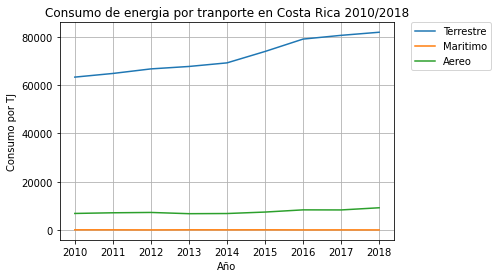

In [48]:
## Creación Gráfico Comparativa "Consumo de energia por tipo de transporte en Costa Rica"
TiposTransporte.plot.line(x='Anno',y=["Terrestre","Maritimo","Aereo",],grid=True, 
                      title="Consumo de energia por tranporte en Costa Rica 2010/2018", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [49]:
## Medios de transporte 
MediosTransporte=MediosTransporte.set_index('Descripcion')


In [50]:
MediosTransporte = MediosTransporte.transpose()

In [51]:
MediosTransporte

Descripcion,1. Privado,2. Publico,3. Carga,4. Equipo especial,5. Otros,6. Ferrocarril
2010,29474.0,7415.0,21917.0,3878.0,630.0,46.0
2011,31122.0,6768.0,24174.0,2562.0,200.0,51.0
2012,32601.0,6918.0,24752.0,2321.0,116.0,57.0
2013,33280.0,7051.0,25311.0,2038.0,25.0,67.0
2014,34096.0,7319.0,25679.0,2077.0,27.0,64.0
2015,36899.0,7630.0,27149.0,2213.0,31.0,64.0
2016,39762.0,8015.0,28857.0,2384.0,36.0,64.0
2017,40694.0,8017.0,29428.0,2431.0,37.0,62.0
2018,41241.0,8124.0,30007.0,2487.0,38.0,56.0


In [52]:
MediosTransporte = MediosTransporte.assign(Anno = ['2010', '2011', '2012', '2013','2014','2015','2016',
                                     '2017','2018'])

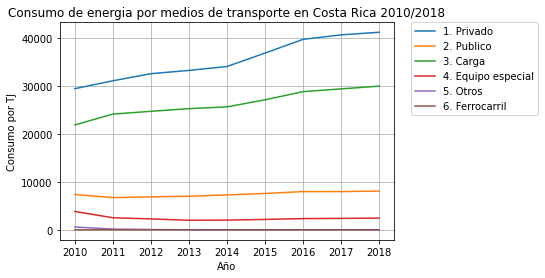

In [54]:
## Creación Gráfico Comparativa "Consumo de energia por medio de transporte en Costa Rica"
MediosTransporte.plot.line(x='Anno',y=["1. Privado","2. Publico","3. Carga",
                                      "4. Equipo especial",'5. Otros',
                                      '6. Ferrocarril'],grid=True, 
                      title="Consumo de energia por medios de transporte en Costa Rica 2010/2018", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('MediosTransporteIMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera;

##### Estadisticas descriptivas

In [55]:
## Analisis descriptivo de sectores
print(Sectores2.describe())

Descripcion   Residencial    Servicios    Comercial     Industria  \
count            9.000000     9.000000     9.000000      9.000000   
mean         21180.000000  6588.111111  3964.888889  38701.444444   
std           1114.178621   475.301600   366.217642   1002.551010   
min          19481.000000  6087.000000  3479.000000  36973.000000   
25%          20620.000000  6206.000000  3636.000000  37995.000000   
50%          20791.000000  6417.000000  3980.000000  38994.000000   
75%          21586.000000  7042.000000  4306.000000  39262.000000   
max          23382.000000  7303.000000  4464.000000  40047.000000   

Descripcion  Agropecuario  
count            9.000000  
mean          3302.666667  
std            260.672208  
min           2854.000000  
25%           3242.000000  
50%           3273.000000  
75%           3337.000000  
max           3761.000000  


In [56]:
## Analisis descriptivo de Transportes
print(TiposTransporte.describe())

Descripcion     Terrestre   Maritimo        Aereo
count            9.000000   9.000000     9.000000
mean         71973.777778  73.111111  7588.333333
std           7132.842452  15.671985   855.304332
min          63360.000000  51.000000  6775.000000
25%          66765.000000  58.000000  6874.000000
50%          69263.000000  78.000000  7290.000000
75%          79120.000000  85.000000  8327.000000
max          81953.000000  91.000000  9227.000000


In [57]:
## Analisis descriptivo de Medios Transportes
print(MediosTransporte.describe())

Descripcion    1. Privado   2. Publico      3. Carga  4. Equipo especial  \
count            9.000000     9.000000      9.000000            9.000000   
mean         35463.222222  7473.000000  26363.777778         2487.888889   
std           4342.087136   506.009387   2698.131426          550.746867   
min          29474.000000  6768.000000  21917.000000         2038.000000   
25%          32601.000000  7051.000000  24752.000000         2213.000000   
50%          34096.000000  7415.000000  25679.000000         2384.000000   
75%          39762.000000  8015.000000  28857.000000         2487.000000   
max          41241.000000  8124.000000  30007.000000         3878.000000   

Descripcion    5. Otros  6. Ferrocarril  
count          9.000000        9.000000  
mean         126.666667       59.000000  
std          197.604403        7.017834  
min           25.000000       46.000000  
25%           31.000000       56.000000  
50%           37.000000       62.000000  
75%          116.0000

#### Consumo por Tipo Fuente

##### Análisis Exploratorio de los Datos

In [58]:
## Asignación de los datos a un dataframe:

Con_Fuente = pd.read_csv('/content/Consumoxtipofuente.csv',sep=',')
Con_Fuente.head(10)

,Ano,Carbon Mineral,Coque,Lena,Bagazo,Otros Res. Veg.,Carbon Vegetal,Casc. De Cafe,Biogas,Electricidad,G.L.P,Gasolina Regular,Gasolina Super,Kerosene,Jet Fuel,Av-Gas,Diesel,Gasoleo,Fuel Oil,Total
0,2010,29.89,"2,675.36","13,998.14","9,836.32","4,395.70",41.80,375.26,-,"30,832.33","5,404.43","19,138.93","12,426.14",128.74,"7,138.21",58.09,"37,366.90",230.96,"5,037.69","149,114.89"
1,2011,229.2,"3,717.92","12,839.58","7,729.44","4,448.78",32.34,407.07,2.99,"31,223.25","5,542.26","19,073.05","13,200.62",164.18,"7,436.25",55.96,"37,846.49",253.23,"4,776.77","148,979.37"
2,2012,91.97,"3,382.79","12,161.88","8,088.95","4,385.46",35.59,461.19,3.03,"32,468.42","5,708.17","19,309.81","14,356.44",282.75,"7,369.51",54.38,"38,341.17",280.72,"5,038.86","151,821.08"
3,2013,204.32,"3,359.27","12,059.79","9,864.93","4,161.97",38.29,461.19,3.03,"32,767.30","6,032.98","19,657.83","14,599.83",257.25,"6,869.56",52.24,"38,437.05",285.36,"4,530.13","153,642.31"
4,2014,248.1,"3,288.28","11,066.46","10,318.32","4,360.37",47.01,371.96,3.03,"31,149.97","6,479.78","19,525.17","15,559.74",261.09,"6,937.01",48.56,"39,234.72",275.64,"4,184.00","155,359.20"
5,2015,14,"3,211.70","10,825.70","10,072.36","3,789.58",56.85,371.37,3.03,"33,942.28","6,817.76","20,132.66","17,866.27",303.5,"7,575.90",48.37,"41,315.37",250.41,"4,199.91","160,797.02"
6,2016,13.51,"3,493.96","10,170.89","10,072.36","3,742.20",44.58,437.15,3.03,"35,225.10","7,464.69","20,419.83","20,610.48",287.68,"8,462.44",49.15,"43,900.44",290.26,"4,287.28","168,975.04"
7,2017,214.02,"3,786.46","10,211.16","9,359.19","3,329.99",46.34,400.44,3.03,"35,642.33","7,934.88","20,565.07","21,401.84",275.21,"8,446.03",53.16,"44,661.06",372.48,"4,273.74","170,976.41"
8,2018,13.87,"3,534.58","8,603.49","9,134.57","3,224.83",42.19,347.55,3.03,"35,958.98","8,215.20","20,563.59","21,740.81",245.85,"9,379.58",41.04,"44,766.79",393.71,"4,107.84","170,317.49"
9,2019,10.19,"1,728.44","8,582.54","9,060.66","3,258.67",38.18,372.59,3.03,"36,573.21","8,736.27","21,566.84","22,426.14",204.06,"9,973.41",41.83,"44,303.51",391.21,"4,145.23","171,416.03"


In [59]:
## Echar un vistazo las columnas:

Con_Fuente.columns

Index(['Ano', 'Carbon Mineral', 'Coque', 'Lena', 'Bagazo', 'Otros Res. Veg.',
       'Carbon Vegetal', 'Casc. De Cafe  ', 'Biogas', 'Electricidad', 'G.L.P',
       'Gasolina Regular', 'Gasolina Super', 'Kerosene', 'Jet Fuel', 'Av-Gas',
       'Diesel', 'Gasoleo', 'Fuel Oil', 'Total'],
      dtype='object')

In [60]:
DBCTF1 = Con_Fuente

##### Limpieza de Datos

In [61]:
## Revisar Datos Faltantes:

total = Con_Fuente.isnull().sum().sort_values(ascending = False)
percent = (Con_Fuente.isnull().sum() / Con_Fuente.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Ano,0,0.0
Carbon Mineral,0,0.0
Fuel Oil,0,0.0
Gasoleo,0,0.0
Diesel,0,0.0
Av-Gas,0,0.0
Jet Fuel,0,0.0
Kerosene,0,0.0
Gasolina Super,0,0.0
Gasolina Regular,0,0.0


In [62]:
DBCTF2 = DBCTF1.drop([10],axis=0)

In [65]:
## Quitar las , de los numeros
DBCTF2['Coque']=DBCTF2['Coque'].str.replace(',','')
DBCTF2['Lena']=DBCTF2['Lena'].str.replace(',','')
DBCTF2['Bagazo']=DBCTF2['Bagazo'].str.replace(',','')
DBCTF2['Otros Res. Veg.']=DBCTF2['Otros Res. Veg.'].str.replace(',','')
DBCTF2['Electricidad']=DBCTF2['Electricidad'].str.replace(',','')
DBCTF2['G.L.P']=DBCTF2['G.L.P'].str.replace(',','')
DBCTF2['Gasolina Regular']=DBCTF2['Gasolina Regular'].str.replace(',','')
DBCTF2['Gasolina Super']=DBCTF2['Gasolina Super'].str.replace(',','')
DBCTF2['Jet Fuel']=DBCTF2['Jet Fuel'].str.replace(',','')
DBCTF2['Diesel']=DBCTF2['Diesel'].str.replace(',','')
DBCTF2['Fuel Oil']=DBCTF2['Fuel Oil'].str.replace(',','')

In [70]:
## Pasar de str a num

DBCTF2['Carbon Mineral'] = pd.to_numeric(DBCTF2['Carbon Mineral'])
DBCTF2['Kerosene'] = pd.to_numeric(DBCTF2['Kerosene'])
DBCTF2['Gasoleo'] = pd.to_numeric(DBCTF2['Gasoleo'])
DBCTF2['Electricidad'] = pd.to_numeric(DBCTF2['Electricidad'])
DBCTF2['Lena'] = pd.to_numeric(DBCTF2['Lena'])
DBCTF2['Bagazo'] = pd.to_numeric(DBCTF2['Bagazo'])
DBCTF2['Otros Res. Veg.'] = pd.to_numeric(DBCTF2['Otros Res. Veg.'])
DBCTF2['G.L.P'] = pd.to_numeric(DBCTF2['G.L.P'])
DBCTF2['Gasolina Regular'] = pd.to_numeric(DBCTF2['Gasolina Regular'])
DBCTF2['Gasolina Super'] = pd.to_numeric(DBCTF2['Gasolina Super'])
DBCTF2['Jet Fuel'] = pd.to_numeric(DBCTF2['Jet Fuel'])
DBCTF2['Diesel'] = pd.to_numeric(DBCTF2['Diesel'])
DBCTF2['Fuel Oil'] = pd.to_numeric(DBCTF2['Fuel Oil'])



##### Graficos

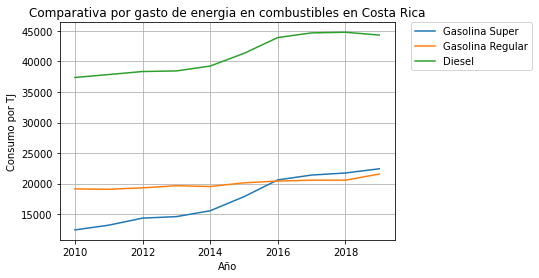

In [73]:
## Creación Gráfico Comparativa por gasto de energia en combustibles 
DBCTF2.plot.line(x='Ano',y=["Gasolina Super","Gasolina Regular","Diesel"],grid=True, 
                      title="Comparativa por gasto de energia en combustibles en Costa Rica", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('GasolinasIMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera

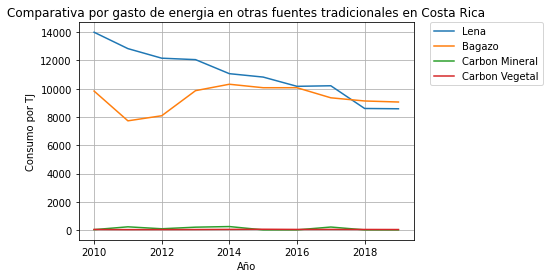

In [76]:
## Creación Gráfico Comparativa por gasto de energia en fuentes tradicionales
DBCTF2.plot.line(x='Ano',y=["Lena","Bagazo","Carbon Mineral", "Carbon Vegetal"],grid=True, 
                      title="Comparativa por gasto de energia en otras fuentes tradicionales en Costa Rica", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

##### Estadisticas descriptivas

In [77]:
## Analisis estadisticos descriptivo
print(DBCTF2.describe())

       Carbon Mineral          Lena        Bagazo  Otros Res. Veg.  \
count       10.000000     10.000000     10.000000        10.000000   
mean       106.907000  11051.963000   9353.710000      3909.755000   
std        104.015508   1755.970098    871.107084       504.571339   
min         10.190000   8582.540000   7729.440000      3224.830000   
25%         13.902500  10180.957500   9079.137500      3433.042500   
50%         60.930000  10946.080000   9597.755000      3975.775000   
75%        211.595000  12136.357500  10020.502500      4379.187500   
max        248.100000  13998.140000  10318.320000      4448.780000   

       Carbon Vegetal  Electricidad       G.L.P  Gasolina Regular  \
count       10.000000     10.000000    10.00000         10.000000   
mean        42.317000  33578.317000  6833.64200      19995.278000   
std          6.935785   2175.998561  1196.43797        796.181319   
min         32.340000  30832.330000  5404.43000      19073.050000   
25%         38.207500  3

#### Generación por Tipo Fuente

##### Análisis Exploratorio de los Datos

In [78]:
## Asignación de los datos a un dataframe:

Gen_Fuente = pd.read_csv('Generacionxtipofuente.csv')
Gen_Fuente.head(10)

,Ano,Hidro,Geotermica,Eolica,Biomasa,Solar,Termica,Total
0,2010,"26,144.25","4,233.89","1,291.23",521.41,0.93,"2,308.23","34,499.95"
1,2011,"25,684.64","4,606.35","1,492.11",500.37,1.73,"3,108.03","35,393.24"
2,2012,"26,039.52","5,049.18","1,902.18",643.04,4.67,"2,989.02","36,627.60"
3,2013,"24,663.76","5,460.25","1,744.45",659.94,8.80,"4,305.59","36,842.78"
4,2014,"24,181.75","5,537.29","2,645.11",650.24,8.88,"3,755.53","36,778.79"
5,2015,"29,039.71","4,952.26","3,886.23",645.38,9.12,389.23,"38,921.94"
6,2016,"28,893.40","4,822.25","4,130.25",617.42,8.69,694.89,"39,166.91"
7,2017,"31,237.06","4,024.20","4,635.64",664.24,16.03,134.7,"40,711.86"
8,2018,"30,034.43","3,486.85","6,475.95",625.19,201.76,570.78,"41,394.96"
9,2019,"28,175.98","5,445.27","6,466.84",608.57,215.35,344.29,"41,256.29"


In [79]:
## Crear otro DF
DBGTF = Gen_Fuente

In [80]:
## Echar un vistazo las columnas:

Gen_Fuente.columns

Index(['Ano', 'Hidro', 'Geotermica', 'Eolica', 'Biomasa', 'Solar', 'Termica',
       'Total'],
      dtype='object')

##### Limpieza de Datos

In [81]:
## Revisar Datos Faltantes:

total = Gen_Fuente.isnull().sum().sort_values(ascending = False)
percent = (Gen_Fuente.isnull().sum() / Gen_Fuente.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Ano,0,0.0
Hidro,0,0.0
Geotermica,0,0.0
Eolica,0,0.0
Biomasa,0,0.0
Solar,0,0.0
Termica,0,0.0
Total,0,0.0


In [82]:
## Quitar las , de los numeros
DBGTF['Hidro']=DBGTF['Hidro'].str.replace(',','')
DBGTF['Geotermica']=DBGTF['Geotermica'].str.replace(',','')
DBGTF['Eolica']=DBGTF['Eolica'].str.replace(',','')
DBGTF['Biomasa']=DBGTF['Biomasa'].str.replace(',','')
DBGTF['Termica']=DBGTF['Termica'].str.replace(',','')

In [83]:
## Pasar de str a int en aquellas que no lo eran
DBGTF['Hidro'] = pd.to_numeric(DBGTF['Hidro'])
DBGTF['Geotermica'] = pd.to_numeric(DBGTF['Geotermica'])
DBGTF['Eolica'] = pd.to_numeric(DBGTF['Eolica'])
DBGTF['Biomasa'] = pd.to_numeric(DBGTF['Biomasa'])
DBGTF['Termica'] = pd.to_numeric(DBGTF['Termica'])


##### Gráficos

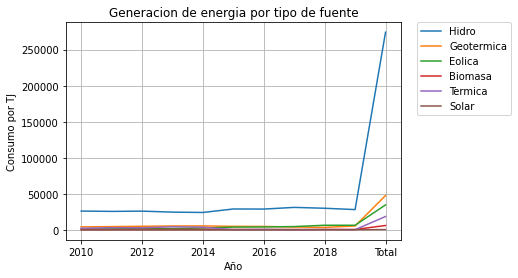

In [85]:
## Creación Gráfico
DBGTF.plot.line(x='Ano',y=["Hidro","Geotermica","Eolica","Biomasa","Termica","Solar"], grid=True, 
                      title="Generacion de energia por tipo de fuente", xlabel="Año", 
                      ylabel="Consumo por TJ", linestyle="solid",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('Gen_Energias_IMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera;;

##### Estadisticas descriptivas

In [87]:
## Analisis de estadisticas descriptivas

print(DBGTF.describe())


               Hidro    Geotermica        Eolica      Biomasa       Solar  \
count      11.000000     11.000000     11.000000    11.000000   11.000000   
mean    49835.363636   8657.780000   6303.634545  1115.600000   86.538182   
std     74412.884690  12937.626857   9591.010566  1665.895377  152.263202   
min     24181.750000   3486.850000   1291.230000   500.370000    0.930000   
25%     25862.080000   4420.120000   1823.315000   612.995000    6.680000   
50%     28175.980000   4952.260000   3886.230000   643.040000    8.880000   
75%     29537.070000   5452.760000   5551.240000   655.090000  108.895000   
max    274094.500000  47617.790000  34669.990000  6135.800000  475.960000   

            Termica  
count     11.000000  
mean    3381.870909  
std     5270.903129  
min      134.700000  
25%      480.005000  
50%     2308.230000  
75%     3431.780000  
max    18600.290000  


#### Importaciones

##### Análisis Exploratorio de los Datos

In [88]:
## Asignación de los datos a un dataframe:

Impor = pd.read_csv('/content/Importaciones.csv')
Impor

,Ano,Importaciones (TJ)
0,2010,"104,818.94"
1,2011,"105,991.40"
2,2012,"105,521.89"
3,2013,"108,967.28"
4,2014,"112,928.31"
5,2015,"107,389.30"
6,2016,"115,170.04"
7,2017,"122,745.30"
8,2018,"117,521.10"
9,2019,"123,790.75"


In [89]:
Impor = Impor.drop([10])

In [90]:
## Echar un vistazo las columnas:

Impor.columns

Index(['Ano', 'Importaciones (TJ)'], dtype='object')

##### Graficos

Text(0.5, 1.0, 'Importaciones de energia en Costa Rica 2010-2019 en TJ')

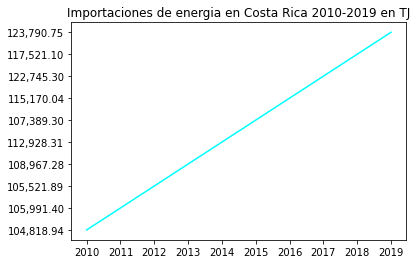

In [91]:
## Creación Gráfico Comparativa de importaciones
plt.plot(Impor["Ano"],Impor["Importaciones (TJ)"], color ="aqua", linestyle="solid")
plt.title("Importaciones de energia en Costa Rica 2010-2019 en TJ")

##### Limpieza de Datos

In [92]:
## Revisar Datos Faltantes:

total = Impor.isnull().sum().sort_values(ascending = False)
percent = (Impor.isnull().sum() / Impor.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Ano,0,0.0
Importaciones (TJ),0,0.0


##### Estadisticas descriptivas

In [93]:
Impor

,Ano,Importaciones (TJ)
0,2010,"104,818.94"
1,2011,"105,991.40"
2,2012,"105,521.89"
3,2013,"108,967.28"
4,2014,"112,928.31"
5,2015,"107,389.30"
6,2016,"115,170.04"
7,2017,"122,745.30"
8,2018,"117,521.10"
9,2019,"123,790.75"


In [94]:
ImporE = Impor.drop(['Ano'], axis=1)

In [95]:
ImporE['Importaciones (TJ)']=ImporE['Importaciones (TJ)'].str.replace(',','')

In [96]:
ImporE['Importaciones (TJ)'] = pd.to_numeric(ImporE['Importaciones (TJ)'])

In [97]:
print(ImporE.describe())



       Importaciones (TJ)
count           10.000000
mean        112484.431000
std           7099.473634
min         104818.940000
25%         106340.875000
50%         110947.795000
75%         116933.335000
max         123790.750000


#### Industria

##### Análisis Exploratorio de los Datos

In [98]:
## Asignación de los datos a un dataframe:

Indus = pd.read_csv('Industria.csv')
Indus.head(10)

,Ano,1. Produc.de alimentos y tabaco (CIIU 31),2. Produccion de textiles y cuero (CIIU 32),3. Produccion de madera (CIIU 33),4. Produccion de papel (CIIU 34),5. Produccion de quimicos (CIIU 35),6. Otras industrias (CIIU 36-39)
0,2010,"22,612.00",918,"3,485.00","1,070.00","2,076.00","7,833.00"
1,2011,"17,734.00",886,"5,713.00","1,061.00","2,048.00","9,532.00"
2,2012,"18,489.00",882,"5,917.00","1,126.00","2,069.00","9,257.00"
3,2013,"19,839.00",838,"5,877.00","1,223.00","2,000.00","9,218.00"
4,2014,"19,986.00",787,"6,055.00","1,220.00","1,948.00","9,210.00"
5,2015,"19,956.00",810,"5,534.00","1,257.00","1,870.00","8,941.00"
6,2016,"20,435.00",841,"5,704.00","1,311.00","1,899.00","9,538.00"
7,2017,"20,367.00",868,"5,131.00","1,359.00","2,084.00","10,238.00"
8,2018,"20,442.00",876,"5,086.00","1,366.00","1,974.00","9,518.00"


In [99]:
## Echar un vistazo las columnas:

Indus.columns

Index(['Ano', '1. Produc.de alimentos y tabaco (CIIU 31)',
       '2. Produccion de textiles y cuero (CIIU 32)',
       '3. Produccion de madera (CIIU 33)', '4. Produccion de papel (CIIU 34)',
       '5. Produccion de quimicos (CIIU 35)',
       '6. Otras industrias (CIIU 36-39)'],
      dtype='object')

##### Limpieza de Datos

In [100]:
## Revisar Datos Faltantes:

total = Indus.isnull().sum().sort_values(ascending = False)
percent = (Indus.isnull().sum() / Indus.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Ano,0,0.0
1. Produc.de alimentos y tabaco (CIIU 31),0,0.0
2. Produccion de textiles y cuero (CIIU 32),0,0.0
3. Produccion de madera (CIIU 33),0,0.0
4. Produccion de papel (CIIU 34),0,0.0
5. Produccion de quimicos (CIIU 35),0,0.0
6. Otras industrias (CIIU 36-39),0,0.0


##### Gráficos

Se encuentra un error en la data, donde varias columnas se clasifican como Object, lo cual no deja realizar los graficos correctamente, por lo tanto, se realiza la conversión para poder utilizarlos.

In [107]:
## Revisar tipo de datos
Indus.dtypes

Ano                                              int64
1. Produc.de alimentos y tabaco (CIIU 31)       object
2. Produccion de textiles y cuero (CIIU 32)      int64
3. Produccion de madera (CIIU 33)              float64
4. Produccion de papel (CIIU 34)               float64
5. Produccion de quimicos (CIIU 35)            float64
6. Otras industrias (CIIU 36-39)               float64
dtype: object

In [110]:
## Cambiar tipo de dato
Indus['1. Produc.de alimentos y tabaco (CIIU 31)'] = Indus['1. Produc.de alimentos y tabaco (CIIU 31)'].str.split().apply(lambda x: float(x[0].replace(',', '')))

In [111]:
Indus.dtypes

Ano                                              int64
1. Produc.de alimentos y tabaco (CIIU 31)      float64
2. Produccion de textiles y cuero (CIIU 32)      int64
3. Produccion de madera (CIIU 33)              float64
4. Produccion de papel (CIIU 34)               float64
5. Produccion de quimicos (CIIU 35)            float64
6. Otras industrias (CIIU 36-39)               float64
dtype: object

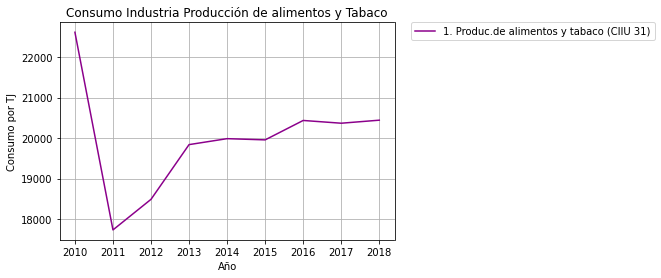

In [114]:
## Creación Gráfico Industria
Indus['Ano'] = pd.to_numeric(Indus['Ano'])
Indus.plot.line(x='Ano',y="1. Produc.de alimentos y tabaco (CIIU 31)",grid=True, 
                      title="Consumo Industria Producción de alimentos y Tabaco", xlabel="Año", 
                      ylabel="Consumo por TJ",color ="darkmagenta", linestyle="solid")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.savefig('Industria_IMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera

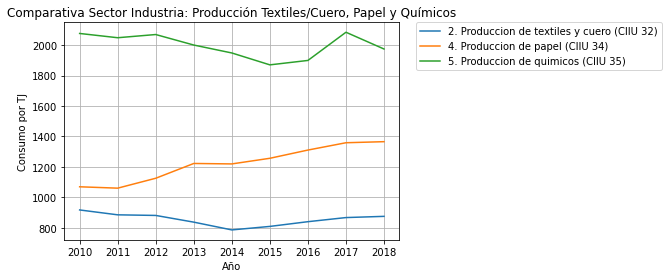

In [115]:
## Creación Gráfico Comparativa Sector Industria: Producción Textiles/Cuero, Papel y Químicos 
Indus.plot.line(x='Ano',y=["2. Produccion de textiles y cuero (CIIU 32)","4. Produccion de papel (CIIU 34)","5. Produccion de quimicos (CIIU 35)"],grid=True, 
                      title="Comparativa Sector Industria: Producción Textiles/Cuero, Papel y Químicos", xlabel="Año", 
                      ylabel="Consumo por TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

##### Estadisticas descriptivas

In [116]:
Indus
INDUSE = Indus.drop(['Ano'], axis=1)

In [117]:
print(INDUSE.describe())

       1. Produc.de alimentos y tabaco (CIIU 31)  \
count                                   9.000000   
mean                                19984.444444   
std                                  1359.484012   
min                                 17734.000000   
25%                                 19839.000000   
50%                                 19986.000000   
75%                                 20435.000000   
max                                 22612.000000   

       2. Produccion de textiles y cuero (CIIU 32)  \
count                                     9.000000   
mean                                    856.222222   
std                                      40.910811   
min                                     787.000000   
25%                                     838.000000   
50%                                     868.000000   
75%                                     882.000000   
max                                     918.000000   

       3. Produccion de madera (CIIU 33)  4.

## Alcance de la Energia en Costa Rica

In [119]:
## Analisis del alcance de Electricidad en Costa Rica:

CRE = pd.read_csv('/content/DBWBank.csv')
CRE.head(10)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
0,9,BES Islands,BES,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,0.000000,0.000000,113.700000,116.300000,120.000000,126.700000
1,11,Nauru,NRU,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,88.950000,89.420000,89.980000,90.540000,90.880000,91.160000
2,13,Nauru,NRU,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,99.175644,99.000000,99.162201,99.162445,99.172058,99.000000
3,14,Nauru,NRU,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,98.424095,99.000000,98.741203,98.908684,99.079735,99.000000
4,16,Nauru,NRU,Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
5,17,Nauru,NRU,Renewable electricity share of total electrici...,4.1_SHARE.RE.IN.ELECTRICITY,0.442478,0.432900,0.421941,0.411523,0.398406,0.398406
6,18,Nauru,NRU,Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,0.324956,0.324156,0.325063,0.324444,0.333466,0.329880
7,19,Nauru,NRU,Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,0.083696,0.092568,0.092258,0.081320,0.078850,0.076290
8,20,Nauru,NRU,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,22.600000,23.100000,23.700000,24.300000,25.100000,25.100000
9,21,Nauru,NRU,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,388.257000,350.183000,352.343000,398.973000,422.911000,432.400600


In [120]:
CRE

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
0,9,BES Islands,BES,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,0.000000,0.000000,113.700000,116.300000,120.000000,126.700000
1,11,Nauru,NRU,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,88.950000,89.420000,89.980000,90.540000,90.880000,91.160000
2,13,Nauru,NRU,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,99.175644,99.000000,99.162201,99.162445,99.172058,99.000000
3,14,Nauru,NRU,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,98.424095,99.000000,98.741203,98.908684,99.079735,99.000000
4,16,Nauru,NRU,Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...
2387,2844,Zimbabwe,ZWE,Renewable electricity share of total electrici...,4.1_SHARE.RE.IN.ELECTRICITY,68.009233,57.855903,60.393350,53.939394,55.605426,52.724276
2388,2845,Zimbabwe,ZWE,Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,292578.100000,297587.400000,304744.900000,311169.400000,320293.300000,324422.600000
2389,2846,Zimbabwe,ZWE,Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,82.879541,79.574227,78.019702,79.561094,81.049292,81.797809
2390,2847,Zimbabwe,ZWE,Total electricity output (GWh),4.1.1_TOTAL.ELECTRICITY.OUTPUT,8665.000000,9216.000000,9203.000000,9570.000000,10026.000000,9709.000000


#### Limpieza de datos

In [121]:
## Seleccionar los datos de Costa Rica

CRDF = CRE.iloc[[524,525,526,527,528,529,530,531,532,533]]


In [122]:
CRDF = CRDF.transpose()

In [123]:
## Renombar columnas
CRDF.columns = ['ACCESS.ELECTRICITY.RURAL', 'ACCESS.ELECTRICITY.TOT',
               'ACCESS.ELECTRICITY.URBAN','PRIMARY.ENERGY.INTENSITY',
              'REN.ELECTRICITY.OUTPUT','SHARE.RE.IN.ELECTRICITY','RE.CONSUMPTION',
              'SHARE.TOTAL.RE.IN.TFEC','TOTAL.ELECTRICITY.OUTPUT','TOTAL.FINAL.ENERGY.CONSUM']

In [124]:
## Eliminar filas
CRDF = CRDF.drop(['Unnamed: 0', 'Country Name', 'Country Code','Indicator Name',
        'Indicator Code'], axis=0)

In [125]:
## Creacion columnas de fechas
CRDF = CRDF.assign(Anno = ['2010', '2011', '2012', '2013','2014','2015'])

In [126]:
CRDF

,ACCESS.ELECTRICITY.RURAL,ACCESS.ELECTRICITY.TOT,ACCESS.ELECTRICITY.URBAN,PRIMARY.ENERGY.INTENSITY,REN.ELECTRICITY.OUTPUT,SHARE.RE.IN.ELECTRICITY,RE.CONSUMPTION,SHARE.TOTAL.RE.IN.TFEC,TOTAL.ELECTRICITY.OUTPUT,TOTAL.FINAL.ENERGY.CONSUM,Anno
2010,97.734454,98.995734,99.746437,3.380726,8942.0,93.311072,61150.97,42.311253,9583.0,144526.493808,2010
2011,97.986184,99.232348,99.964484,3.240789,8969.0,91.222539,58134.51,40.502124,9832.0,143534.473416,2011
2012,98.690151,99.503298,99.98337,3.132748,9344.0,91.84195,54996.98,38.623855,10174.0,142391.225808,2012
2013,98.921142,99.563517,99.939949,3.099427,9039.0,88.314607,55198.39,38.074842,10235.0,144973.39284,2013
2014,98.414246,99.359291,99.704804,3.011812,9174.0,89.791524,55440.6,37.842541,10217.0,146503.375164,2014
2015,98.641978,99.409804,99.929925,2.878982,10704.0,99.00111,58767.05,38.733414,10812.0,151721.844552,2015


### Graficos

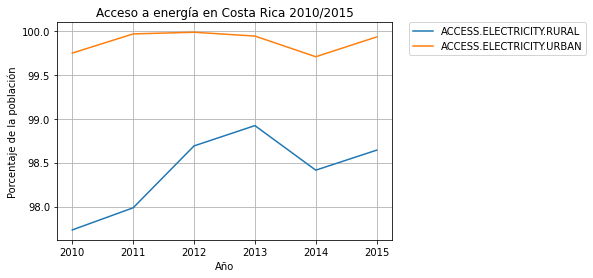

In [127]:
## Creación Gráfico Acceso a Energia en zonas urbanas y rurales
CRDF.plot.line(x='Anno',y=["ACCESS.ELECTRICITY.RURAL","ACCESS.ELECTRICITY.URBAN"],grid=True, 
                      title="Acceso a energía en Costa Rica 2010/2015", xlabel="Año", 
                      ylabel="Porcentaje de la población",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

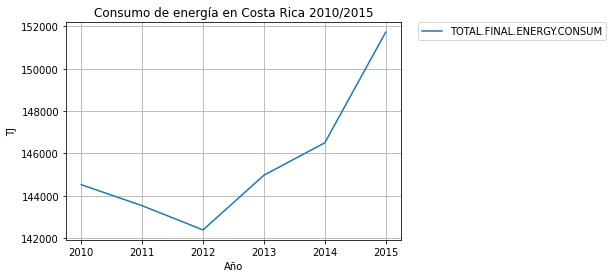

In [129]:
## Consumo total de energía en Costa Rica 2021 
## Creación Gráfico Acceso a Energia en zonas urbanas y rurales
CRDF.plot.line(x='Anno',y=["TOTAL.FINAL.ENERGY.CONSUM"],grid=True, 
                      title="Consumo de energía en Costa Rica 2010/2015", xlabel="Año", 
                      ylabel="TJ",)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.savefig('ConsumoCR_IMAGEN.png', bbox_inches='tight');                   ## Descargar imagen con leyenda por fuera


### Estadisticas descriptivas




In [130]:
CRDF

,ACCESS.ELECTRICITY.RURAL,ACCESS.ELECTRICITY.TOT,ACCESS.ELECTRICITY.URBAN,PRIMARY.ENERGY.INTENSITY,REN.ELECTRICITY.OUTPUT,SHARE.RE.IN.ELECTRICITY,RE.CONSUMPTION,SHARE.TOTAL.RE.IN.TFEC,TOTAL.ELECTRICITY.OUTPUT,TOTAL.FINAL.ENERGY.CONSUM,Anno
2010,97.734454,98.995734,99.746437,3.380726,8942.0,93.311072,61150.97,42.311253,9583.0,144526.493808,2010
2011,97.986184,99.232348,99.964484,3.240789,8969.0,91.222539,58134.51,40.502124,9832.0,143534.473416,2011
2012,98.690151,99.503298,99.98337,3.132748,9344.0,91.84195,54996.98,38.623855,10174.0,142391.225808,2012
2013,98.921142,99.563517,99.939949,3.099427,9039.0,88.314607,55198.39,38.074842,10235.0,144973.39284,2013
2014,98.414246,99.359291,99.704804,3.011812,9174.0,89.791524,55440.6,37.842541,10217.0,146503.375164,2014
2015,98.641978,99.409804,99.929925,2.878982,10704.0,99.00111,58767.05,38.733414,10812.0,151721.844552,2015


In [131]:
CRDF.columns

Index(['ACCESS.ELECTRICITY.RURAL', 'ACCESS.ELECTRICITY.TOT',
       'ACCESS.ELECTRICITY.URBAN', 'PRIMARY.ENERGY.INTENSITY',
       'REN.ELECTRICITY.OUTPUT', 'SHARE.RE.IN.ELECTRICITY', 'RE.CONSUMPTION',
       'SHARE.TOTAL.RE.IN.TFEC', 'TOTAL.ELECTRICITY.OUTPUT',
       'TOTAL.FINAL.ENERGY.CONSUM', 'Anno'],
      dtype='object')

In [132]:
## Pasar a numero
CRDF['ACCESS.ELECTRICITY.RURAL'] = pd.to_numeric(CRDF['ACCESS.ELECTRICITY.RURAL'])
CRDF['ACCESS.ELECTRICITY.URBAN'] = pd.to_numeric(CRDF['ACCESS.ELECTRICITY.URBAN'])
CRDF['ACCESS.ELECTRICITY.TOT'] = pd.to_numeric(CRDF['ACCESS.ELECTRICITY.TOT'])
CRDF['PRIMARY.ENERGY.INTENSITY'] = pd.to_numeric(CRDF['PRIMARY.ENERGY.INTENSITY'])
CRDF['REN.ELECTRICITY.OUTPUT'] = pd.to_numeric(CRDF['REN.ELECTRICITY.OUTPUT'])
CRDF['SHARE.RE.IN.ELECTRICITY'] = pd.to_numeric(CRDF['SHARE.RE.IN.ELECTRICITY'])
CRDF['RE.CONSUMPTION'] = pd.to_numeric(CRDF['RE.CONSUMPTION'])
CRDF['TOTAL.FINAL.ENERGY.CONSUM'] = pd.to_numeric(CRDF['TOTAL.FINAL.ENERGY.CONSUM'])

In [133]:
print(CRDF.describe())

       ACCESS.ELECTRICITY.RURAL  ACCESS.ELECTRICITY.TOT  \
count                  6.000000                6.000000   
mean                  98.398026               99.343999   
std                    0.453587                0.205856   
min                   97.734454               98.995734   
25%                   98.093199               99.264084   
50%                   98.528112               99.384547   
75%                   98.678108               99.479924   
max                   98.921142               99.563517   

       ACCESS.ELECTRICITY.URBAN  PRIMARY.ENERGY.INTENSITY  \
count                  6.000000                  6.000000   
mean                  99.878161                  3.124081   
std                    0.120351                  0.174842   
min                   99.704804                  2.878982   
25%                   99.792309                  3.033716   
50%                   99.934937                  3.116088   
75%                   99.958350          

# Conclusión

Es un hecho que a la mayor generación de energía y su consumo, mayor es el impacto ambiental del climático en el mundo. Esto podemos observarlo en el consumo energético de nuestro propio país, donde podemos ver claramente el aumento sustancial del consumo de la energía. 

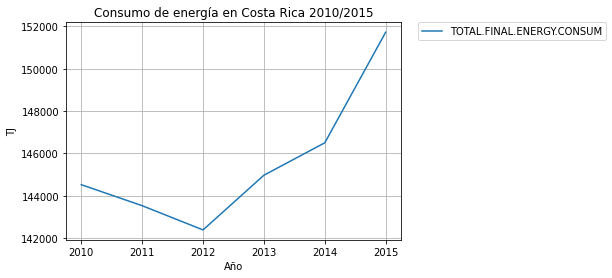

Y es que, como podemos observar en los siguientes gráficos, los sectores económicos del país que agregan a este incremento al consumo energético del país son los sectores de Transporte, Servicios, Público y Agropecuario. 

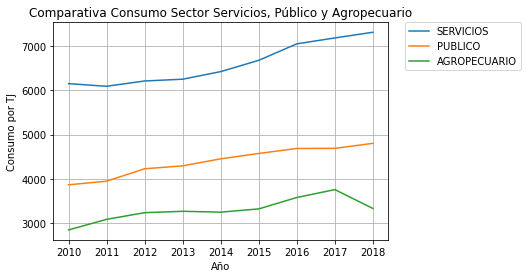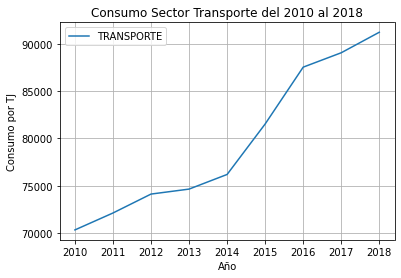

Como pudimos observar el Sector Transporte es el sector con la cantidad más grande de consumo energético del país, pero gracias al análisis podemos entrar más a fondo en cuáles son los modos de transporte donde más se consumen. Para nuestro caso fueron los de Transporte Privado y de Carga. 

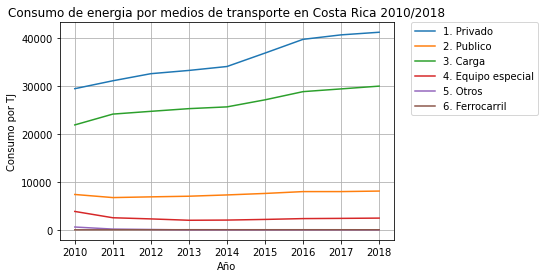

Pero, ¿cómo es que afecta el consumo energético del sector transporte al cambio climático? Para poder moverse, un vehículo de transporte ocupa de la combustión de combustibles fósiles lo que genera muchos gases de efecto invernadero que se trasladan inmediatamente a la atmósfera y generan el efecto del cambio climático. Como podemos observar en el siguiente gráfico, el Diesel y la Gasolina Súper son los hidrocarburos que están en aumento en la generación de estos gases. 

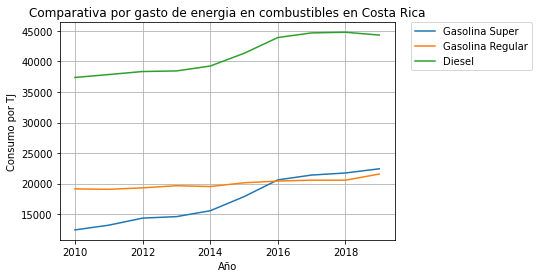

Aunque podemos observar como cada año, aumentamos nuestro consumo energético, y por ende, incrementando los efectos del cambio climático en nuestro país, aún existen oportunidades para poder revertir esto y hacer un cambio. Estas oportunidades son las energías renovables, provinientes de fuentes naturales para la generación de energía y su consumo. Actualmente podemos observar que en Costa Rica estamos empezando a adoptar estas formas de generación de energía, más que todo con la generación de energía Hidroeléctrica, donde podemos observar un repunte de esta energía generada en el país. 

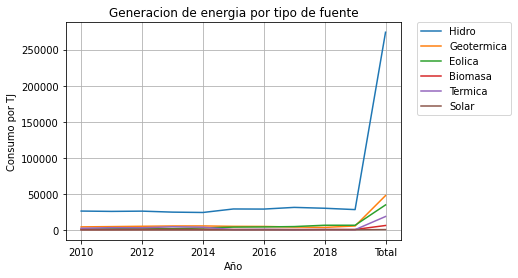

Aún estamos a tiempo, es el momento preciso para poder disminuir los efectos del cambio climático, que es más que una realidad, con políticas públicas a favor de la inversión en generadores de energías renovables. 

# Referencias

United Nations. (2020). ¿Qué es el cambio climático? | Naciones Unidas. https://www.un.org/es/climatechange/what-is-climate-change#:%7E:text=Cada%20aumento%20del%20calentamiento%20global,y%20a%20mantener%20un%20clima%20habitable.